In [1]:
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Set project root and scripts path ---
# Assuming notebook is in 'notebooks/' and scripts are in '../scripts'
NOTEBOOK_DIR = os.getcwd()
PROJECT_ROOT = os.path.dirname(NOTEBOOK_DIR)  # main_folder
SCRIPTS_PATH = os.path.join(PROJECT_ROOT, 'scripts')
UTILS_PATH = os.path.join(SCRIPTS_PATH, 'utils')

# Add scripts and utils to sys.path
sys.path.extend([SCRIPTS_PATH, UTILS_PATH])

print(f"Project root: {PROJECT_ROOT}")
print(f"Scripts path added: {SCRIPTS_PATH}")
print(f"Utils path added: {UTILS_PATH}")

# --- Import modules ---
try:
    from data_scraper import main as run_scraper
except ImportError as e:
    raise ImportError(f"Failed to import data_scraper: {e}")

try:
    from data_preprocessing import ReviewPreprocessor
except ImportError:
    print("Warning: data_preprocessing module not found.")


Project root: c:\Users\amare\Documents\KAIM\week-2\customer-experience-analytics
Scripts path added: c:\Users\amare\Documents\KAIM\week-2\customer-experience-analytics\scripts
Utils path added: c:\Users\amare\Documents\KAIM\week-2\customer-experience-analytics\scripts\utils


In [2]:
print("🚀 Starting Scraper...")

# Run the main scraper function
raw_df = run_scraper()

print("\n✅ Scraping Finished.")
display(raw_df.head())

🚀 Starting Scraper...
Starting Google Play Store Review Scraper

[1/2] Fetching app information...

CBE: Commercial Bank of Ethiopia
App ID: com.combanketh.mobilebanking
Current Rating: 4.325405
Total Ratings: 38820
Total Reviews: 8333

BOA: Bank of Abyssinia
App ID: com.boa.boaMobileBanking
Current Rating: 4.191153
Total Ratings: 6321
Total Reviews: 1218

Dashen: Dashen Bank
App ID: com.dashen.dashensuperapp
Current Rating: 4.1387663
Total Ratings: 3890
Total Reviews: 769

App information saved to c:\Users\amare\Documents\KAIM\week-2\customer-experience-analytics\data/raw/app_info.csv

[2/2] Scraping reviews...


Banks:   0%|          | 0/3 [00:00<?, ?it/s]


Scraping reviews for com.combanketh.mobilebanking...
Successfully scraped 500 reviews
Collected 500 reviews for Commercial Bank of Ethiopia


Banks:  33%|███▎      | 1/3 [00:05<00:10,  5.40s/it]


Scraping reviews for com.boa.boaMobileBanking...
Successfully scraped 500 reviews
Collected 500 reviews for Bank of Abyssinia


Banks:  67%|██████▋   | 2/3 [00:13<00:06,  6.91s/it]


Scraping reviews for com.dashen.dashensuperapp...
Successfully scraped 500 reviews
Collected 500 reviews for Dashen Bank


Banks: 100%|██████████| 3/3 [00:20<00:00,  6.77s/it]


Scraping Complete!

Total reviews collected: 1500
Reviews per bank:
  Commercial Bank of Ethiopia: 500
  Bank of Abyssinia: 500
  Dashen Bank: 500

Data saved to: c:\Users\amare\Documents\KAIM\week-2\customer-experience-analytics\data/raw/reviews_raw.csv

Sample Reviews

Commercial Bank of Ethiopia:
------------------------------------------------------------

Rating: ⭐⭐⭐⭐⭐
Review: the most advanced app. but how to stay safe?...
Date: 2025-11-27 10:03:41

Rating: ⭐⭐⭐⭐
Review: Good application...
Date: 2025-11-27 08:59:12

Rating: ⭐⭐⭐⭐⭐
Review: It is nice app...
Date: 2025-11-26 12:03:18

Bank of Abyssinia:
------------------------------------------------------------

Rating: ⭐⭐⭐⭐⭐
Review: good jop...
Date: 2025-11-27 13:19:25

Rating: ⭐⭐⭐⭐⭐
Review: ok...
Date: 2025-11-27 12:46:01

Rating: ⭐
Review: bad exprience...it is so crushed...
Date: 2025-11-27 11:41:15

Dashen Bank:
------------------------------------------------------------

Rating: ⭐⭐⭐⭐⭐
Review: its fast and easy to communic

,review_id,review_text,rating,review_date,user_name,thumbs_up,reply_content,bank_code,bank_name,app_id,source
0,f8002d06-b5c5-4ed1-9d51-a9a379304cf8,the most advanced app. but how to stay safe?,5,2025-11-27 10:03:41,Sayid Ahmad,0,None,CBE,Commercial Bank of Ethiopia,4.4.0,Google Play
1,81000db5-aa51-467e-826c-fc96160e96a8,Good application,4,2025-11-27 08:59:12,Hiwot Gebrie,0,None,CBE,Commercial Bank of Ethiopia,None,Google Play
2,3d88a334-958c-4717-9f97-c5d46359e054,It is nice app,5,2025-11-26 12:03:18,samson getachew,1,None,CBE,Commercial Bank of Ethiopia,5.2.1,Google Play
3,99d376ea-4824-4af9-a093-27360acc3a5c,best,5,2025-11-25 20:27:20,Nejbadin Ali,0,None,CBE,Commercial Bank of Ethiopia,5.2.1,Google Play
4,f1861daf-a1ed-407a-9e7c-295edbb3877d,good app,5,2025-11-25 18:10:35,Amman Mom,0,None,CBE,Commercial Bank of Ethiopia,5.2.1,Google Play


In [6]:
# Initialize the preprocessor
preprocessor = ReviewPreprocessor()

# Run the process
success = preprocessor.process()

if success:
    print("\n✅ Preprocessing finished successfully!")
    df = preprocessor.df
else:
    print("❌ Preprocessing failed.")

STARTING DATA PREPROCESSING
Loading raw data...
Loaded 1500 reviews

[1/6] Checking for missing data...

Missing values:
  reply_content: 1498 (99.87%)
  app_id: 332 (22.13%)

[2/6] Handling missing values...

[NEW] Removing duplicate reviews...
Removed 3 duplicate reviews

[3/6] Normalizing dates...
Date range: 2024-08-03 to 2025-11-27

[4/6] Cleaning text...

[5/6] Validating ratings...
All ratings are valid (1-5)

[6/6] Preparing final output...
Final dataset: 1497 reviews

Saving processed data...
Data saved to: c:\Users\amare\Documents\KAIM\week-2\customer-experience-analytics\data/processed/reviews_processed.csv

PREPROCESSING REPORT

Original records: 1500
Records with missing critical data: 0
Empty reviews removed: 0
Invalid ratings removed: 0
Final records: 1497

Data retention rate: 99.80%
Data error rate: 0.20%
✓ Data quality: EXCELLENT (<5% errors)

Reviews per bank:
  Commercial Bank of Ethiopia: 500
  Bank of Abyssinia: 499
  Dashen Bank: 498

Rating distribution:
  ⭐⭐⭐⭐⭐

C:\Users\amare\AppData\Local\Temp\ipykernel_18864\307724874.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rating', data=df, palette='viridis')
C:\Users\amare\AppData\Local\Temp\ipykernel_18864\307724874.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='bank_code', data=df, palette='Set2')


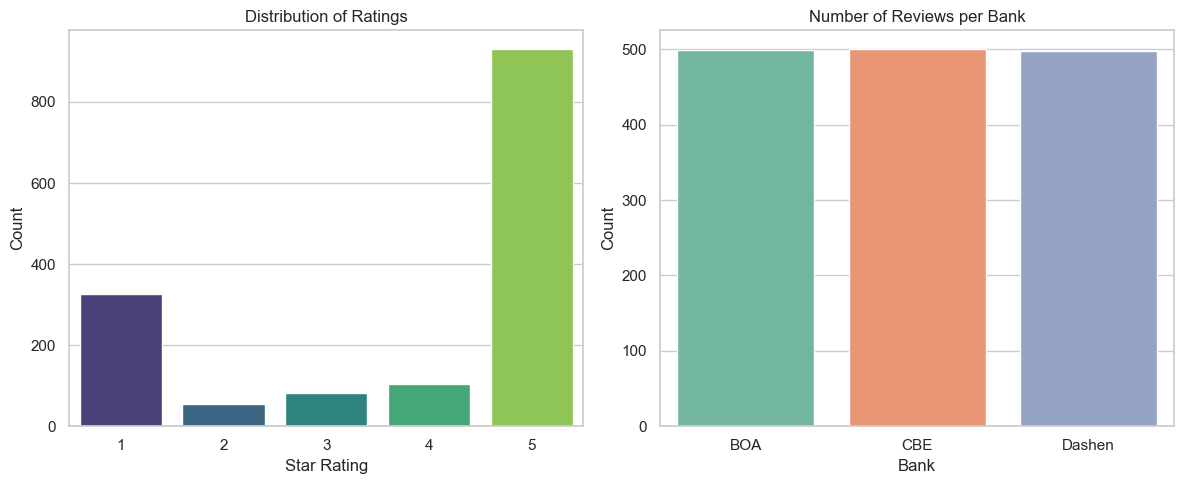

In [4]:
# Set plot style
sns.set(style="whitegrid")
plt.figure(figsize=(12, 5))

# 1. Ratings Distribution
plt.subplot(1, 2, 1)
sns.countplot(x='rating', data=df, palette='viridis')
plt.title('Distribution of Ratings')
plt.xlabel('Star Rating')
plt.ylabel('Count')

# 2. Reviews per Bank
plt.subplot(1, 2, 2)
sns.countplot(x='bank_code', data=df, palette='Set2')
plt.title('Number of Reviews per Bank')
plt.xlabel('Bank')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

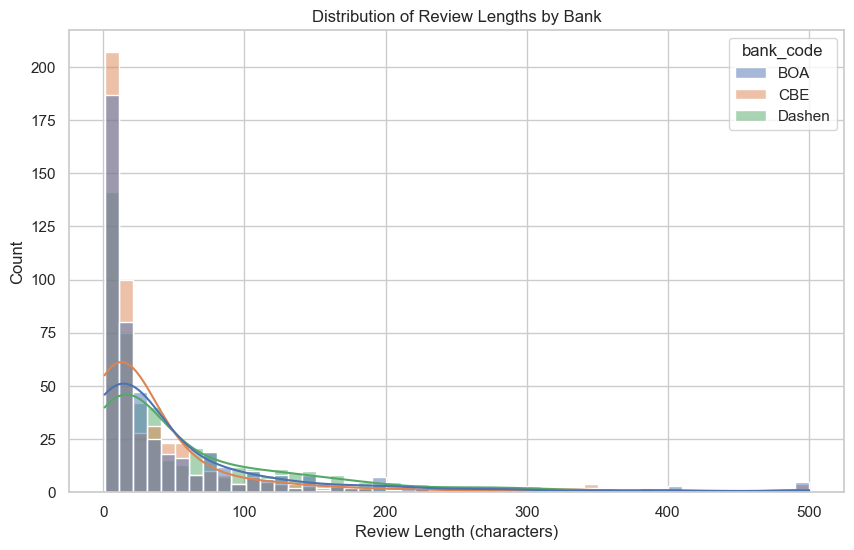

In [5]:
# 3. Review Length Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='text_length', bins=50, kde=True, hue='bank_code')
plt.title('Distribution of Review Lengths by Bank')
plt.xlabel('Review Length (characters)')
plt.ylabel('Count')
plt.show()